<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/test/Statistics%20related%20python/Week2/%E5%AF%BC%E5%85%A5Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
data = pd.read_excel('IMA2.xlsx', index_col=0)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df_Crane=data.melt(var_name='Crane',value_name='Interval')
print(df_Crane)
print(data.iloc[:, 0])
print(data.iloc[:, 1])
print(data.iloc[:, 2])

Saving IMA2.xlsx to IMA2.xlsx
      Crane  Interval
0   Crane14     140.0
1   Crane14     140.0
2   Crane14     112.0
3   Crane14      90.0
4   Crane14      32.0
..      ...       ...
61  Crane16       NaN
62  Crane16       NaN
63  Crane16       NaN
64  Crane16       NaN
65  Crane16       NaN

[66 rows x 2 columns]
NO1     140.0
NO2     140.0
NO3     112.0
NO4      90.0
NO5      32.0
NO6     154.0
NO7     359.0
NO8     207.0
NO9      61.0
NO10     39.0
NO11     40.0
NO12      NaN
NO13      NaN
NO14      NaN
NO15      NaN
NO16      NaN
NO17      NaN
NO18      NaN
NO19      NaN
NO20      NaN
NO21      NaN
NO22      NaN
Name: Crane14, dtype: float64
NO1      69
NO2      14
NO3      38
NO4      94
NO5      46
NO6      36
NO7      84
NO8     106
NO9     269
NO10    445
NO11     42
NO12    108
NO13    244
NO14     92
NO15    148
NO16    303
NO17     24
NO18    328
NO19    207
NO20    260
NO21    132
NO22     56
Name: Crane15, dtype: int64
NO1      39.0
NO2     135.0
NO3      57.0
NO4      31

In [3]:
# 检查数据帧中的缺失值
print(data.isna().sum())

# 将所有缺失值替换为 0
data = data.fillna(0)

Crane14    11
Crane15     0
Crane16     5
dtype: int64


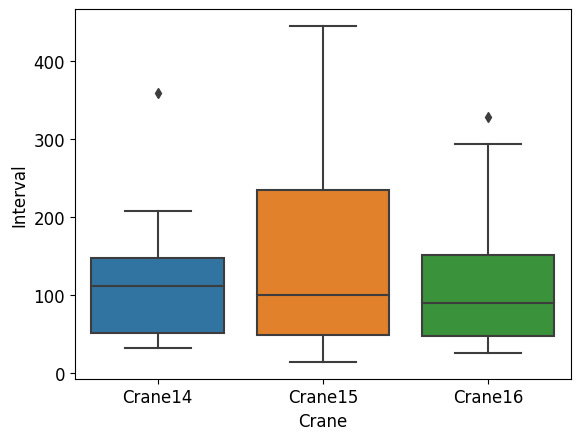

In [4]:
# 用箱线图显示分布
import matplotlib.pyplot  as plt
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
import pandas as pd
import seaborn as sns
data= pd.read_excel('IMA2.xlsx',index_col=0)
data_melt = data.melt()
data_melt.columns = ['Crane', 'Interval']
sns.boxplot(x = 'Crane', y = 'Interval', data = data_melt)
plt.show()

In [5]:
# Bartlett 方差齐性检验
import pandas as pd
from scipy.stats import bartlett

# 将数据按照 Crane 分类变量进行分组
gb = df_Crane.groupby('Crane')

# 将每个分组中的 Interval 数据提取出来作为输入数据
data_for_analysis = [group['Interval'] for name, group in gb]

# 使用 Bartlett 方差齐性检验来检查数据
stat, p = bartlett(*data_for_analysis)

# 打印 Bartlett 方差齐性检验结果
print('Bartlett test statistic = {:.4f}, p-value = {:.4f}'.format(stat, p))

Bartlett test statistic = 1.9278, p-value = 0.3814


In [6]:
# One way ANOVA
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data= pd.read_excel('IMA2.xlsx',index_col=0)

# 先来看下从Crane因素开始分析，
df_Crane=data.melt(var_name='Crane',value_name='Interval')#使用melt（）函数将读取数据进行结构转换，以满足ols（）函数对数据格式的要求，melt（）函数能将列标签转换为列数据
model_Crane=ols('Interval~C(Crane)',df_Crane).fit()# ols（）创建一线性回归分析模型
anova_table=anova_lm(model_Crane)# anova_lm（）函数创建模型生成方差分析表
print(anova_table)

# 进行事后比较分析
print(pairwise_tukeyhsd(df_Crane['Interval'], df_Crane['Crane']))

            df         sum_sq       mean_sq        F    PR(>F)
C(Crane)   2.0    7170.286952   3585.143476  0.33205  0.719121
Residual  47.0  507459.393048  10797.008363      NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1  group2 meandiff p-adj lower upper reject
-------------------------------------------------
Crane14 Crane15      nan   nan   nan   nan  False
Crane14 Crane16      nan   nan   nan   nan  False
Crane15 Crane16      nan   nan   nan   nan  False
-------------------------------------------------


In [12]:
# One-way ANOVA （Method 2 ： 无法看出P值，所以用上一种方法
import matplotlib.pyplot as plt
import scipy.stats as stats

# 将数据按照 Crane 分类变量进行分组
gb = df_Crane.groupby('Crane')

# 将每个分组中的 Interval 数据提取出来作为输入数据
data_for_analysis = [group['Interval'] for name, group in gb]

anova_result = stats.f_oneway(*data_for_analysis)

print(anova_result.pvalue)

# Interpreting the result
if anova_result.pvalue < 0.05:
    print("At least one group mean is different")
else:
    print("No group mean is significantly different")

# 选择要分析的 Crane 类别
crane_category = 'Crane14'

# 从 gb 分组对象中提取该类别的数据
data_for_analysis = gb.get_group('Crane14')['Interval']

nan
No group mean is significantly different


In [24]:
# T-test for three samples
import numpy as np
import scipy.stats as stats

data_for_ttest = gb.get_group('Crane16')['Interval']

# 计算样本均值和标准差
mean = np.mean(data_for_ttest)
std = np.std(data_for_ttest, ddof=1)

# 计算置信区间
conf_int = stats.t.interval(0.95, len(data_for_ttest) - 1, loc=mean, scale=std / np.sqrt(len(data_for_ttest)))

# 输出结果
print("Sample mean:", mean)
print("Sample standard deviation:", std)
print("95% confidence interval:", conf_int)

# 进行单样本 t 检验
ttest_result = stats.ttest_1samp(data_for_ttest, 120)

# 输出 t 检验结果
print("t statistic:", ttest_result.statistic)
print("p-value:", ttest_result.pvalue)

# 判断样本均值是否显著大于 120
if ttest_result.pvalue < 0.05 and ttest_result.statistic >= 0:
    print("The mean is not significantly greater than 120")
else:
    print("The mean is significantly greater than 120")

Sample mean: 116.29411764705883
Sample standard deviation: 87.99273031469869
95% confidence interval: (77.28032663832242, 155.30790865579525)
t statistic: nan
p-value: nan
The mean is significantly greater than 120


In [28]:
data_for_ttest1 = gb.get_group('Crane14')['Interval']

# 计算样本均值和标准差
mean1 = np.mean(data_for_ttest1)
data_for_ttest2 = gb.get_group('Crane15')['Interval']
mean2 = np.mean(data_for_ttest2)
data_for_ttest3 = gb.get_group('Crane16')['Interval']
mean3 = np.mean(data_for_ttest3)

Total_mean = np.mean([mean1,mean2,mean3])
print(Total_mean)

128.05258467023174


In [29]:
ttest_result = stats.ttest_1samp(Total_mean, 120)
# 输出 t 检验结果
print("t statistic:", ttest_result.statistic)
print("p-value:", ttest_result.pvalue)

# 判断样本均值是否显著大于 120
if ttest_result.pvalue < 0.05 and ttest_result.statistic >= 0:
    print("The mean is not significantly greater than 120")
else:
    print("The mean is significantly greater than 120")

t statistic: nan
p-value: nan
The mean is significantly greater than 120


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


t statistic: nan
p-value: nan
The mean is significantly greater than 120
